In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#Load data
#PASTE THE SPOTIFY DATA JSON FILE LINK HERE- example: account\user\my_spotify_data\Spotify Account Data\StreamingHistory_music_0.json
df = pd.read_json(r"")

#Filter out un heard songs
df_clean = df[df['msPlayed'] > 20000]

#Add minutes column
df_clean.loc[:, 'mins'] = (df_clean['msPlayed'] / (1000 * 60)).round(2)
print(df.head())
#stats
print("Original rows:", df.shape[0])
print("Clean rows:", df_clean.shape[0])
print("Dropped %:", round((df.shape[0] - df_clean.shape[0]) / df.shape[0] * 100, 2))

            endTime       artistName                           trackName  \
0  2024-06-28 12:34          Shakira  Hips Don't Lie (feat. Wyclef Jean)   
1  2024-06-30 11:29  Parker McCollum                        Pretty Heart   
2  2024-06-30 11:33  Backstreet Boys                  I Want It That Way   
3  2024-06-30 11:33            Kelis                           Milkshake   
4  2024-06-30 12:32    Ariana Grande                     Dangerous Woman   

   msPlayed  
0     30424  
1    180258  
2     22582  
3    182408  
4    115881  
Original rows: 2059
Clean rows: 1077
Dropped %: 47.69


C:\Users\Samruddhi\AppData\Local\Temp\ipykernel_18908\292022874.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.loc[:, 'mins'] = (df_clean['msPlayed'] / (1000 * 60)).round(2)


In [37]:
#show top 10
grouped = df_clean.groupby('artistName')['mins'].sum()
sorted_grouped = grouped.sort_values(ascending=False)
top10=sorted_grouped.head(10)
print(top10)


artistName
Pritam            193.23
Sachet Tandon     104.44
Taylor Swift       91.44
Vishal-Shekhar     84.80
Manan Bhardwaj     78.87
Arijit Singh       76.04
Coldplay           71.22
Atif Aslam         59.77
Sachin-Jigar       51.85
Ashe               51.82
Name: mins, dtype: float64


<Axes: title={'center': 'visualization of top10'}, xlabel='artistName', ylabel='minutes'>

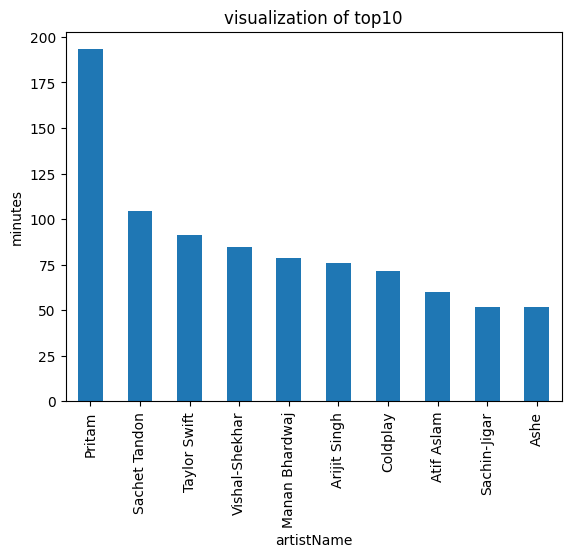

In [38]:
#visualization
plt.title('visualization of top10')
plt.ylabel('minutes')
top10.plot(kind='bar')

C:\Users\Samruddhi\AppData\Local\Temp\ipykernel_18908\3568246355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['endTime'] = pd.to_datetime(df_clean['endTime'])
C:\Users\Samruddhi\AppData\Local\Temp\ipykernel_18908\3568246355.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['hour'] = df_clean['endTime'].dt.hour


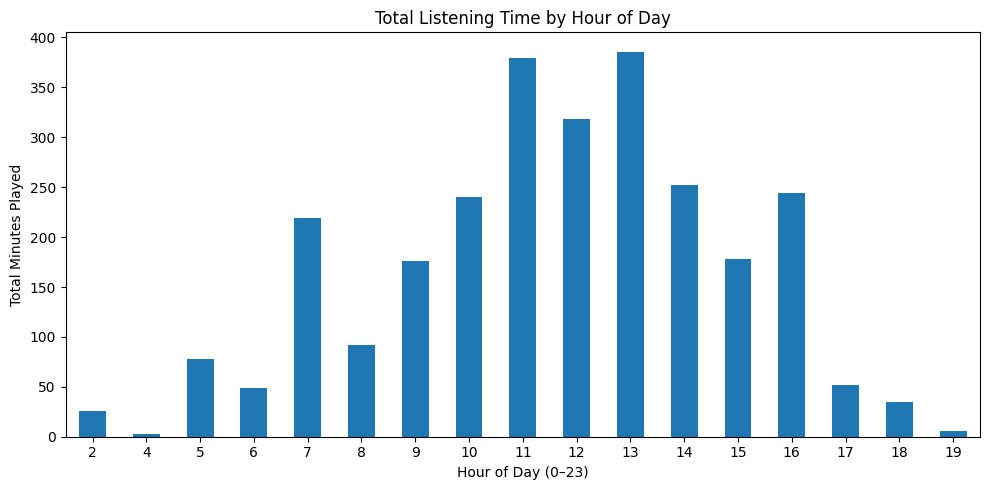

In [6]:
#listening based on day
df_clean['endTime'] = pd.to_datetime(df_clean['endTime'])

df_clean['hour'] = df_clean['endTime'].dt.hour

hourly = df_clean.groupby('hour')['mins'].sum()

hourly.plot(kind='bar', figsize=(10,5))
plt.title("Total Listening Time by Hour of Day")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Total Minutes Played")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


C:\Users\Samruddhi\AppData\Local\Temp\ipykernel_18908\1089058622.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['dayofweek'] = df_clean['endTime'].dt.dayofweek
C:\Users\Samruddhi\AppData\Local\Temp\ipykernel_18908\1089058622.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['dayname'] = df_clean['dayofweek'].map(day_labels)


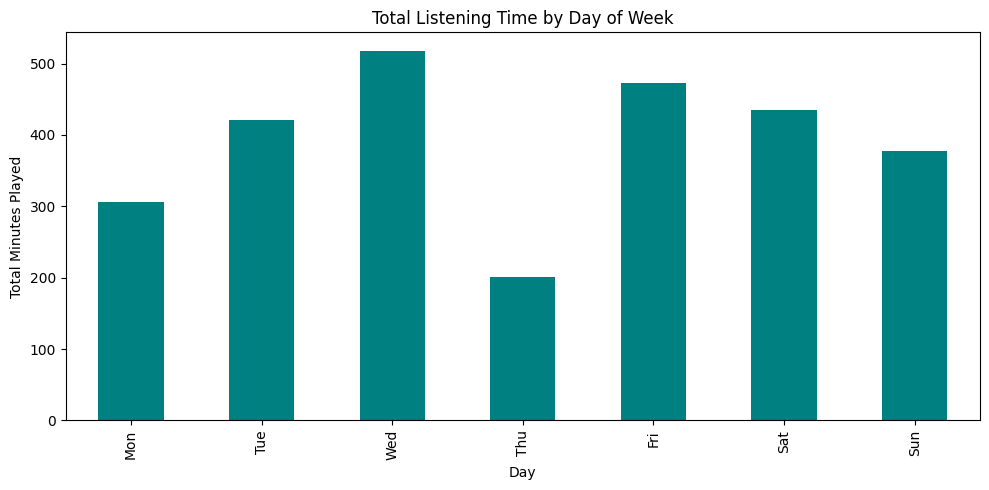

In [4]:
#Weekly Listening Analysis
df_clean['dayofweek'] = df_clean['endTime'].dt.dayofweek

day_labels = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df_clean['dayname'] = df_clean['dayofweek'].map(day_labels)

weekly = df_clean.groupby('dayname')['mins'].sum()
weekly = weekly.reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])  # order the days

weekly.plot(kind='bar', figsize=(10,5), color='teal')
plt.title("Total Listening Time by Day of Week")
plt.xlabel("Day")
plt.ylabel("Total Minutes Played")
plt.tight_layout()
plt.show()
